In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("Downloads\\Polynomialdata_train.csv")
#print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy


<h3>STEPS</h3>
1)Understanding the given dataset.
<br>
2) Defining some necesarry functions.
<br>
3)Creating higher degree polynomial features
<br>
4)scaling the features.
<br>
5)Finding parameters using Gradient Descent algorithm.
<br>
6)Calculating accuracy of the model developed for training dataset.
<br>
7)Testing the model on test dataset.

<h3>Understanding the Training Dataset</h3>

In [3]:
np.random.shuffle(data)
X = data[:, range(1,4)]   #features
Y = data[: , 0]            #targets


In [4]:
X_train = X[:40000,:]
Y_train = Y[:40000]
X_val = X[40000:,:]
Y_val = Y[40000:]

In [5]:
print(X_train[:2, :])
print(X_train.shape)
print(X_val.shape)

[[-11.45874328   3.23110615   8.75310763]
 [ 53.50385438  -1.99190482 -44.59904257]]
(40000, 3)
(10000, 3)


In [6]:
print(Y_train[:2])
Y_train.shape

[-4.30152455e-02  9.66963089e+01]


(40000,)

In [7]:
print(X_train[0].max())
print(X_train[0].min())  

8.753107626669376
-11.458743278402345


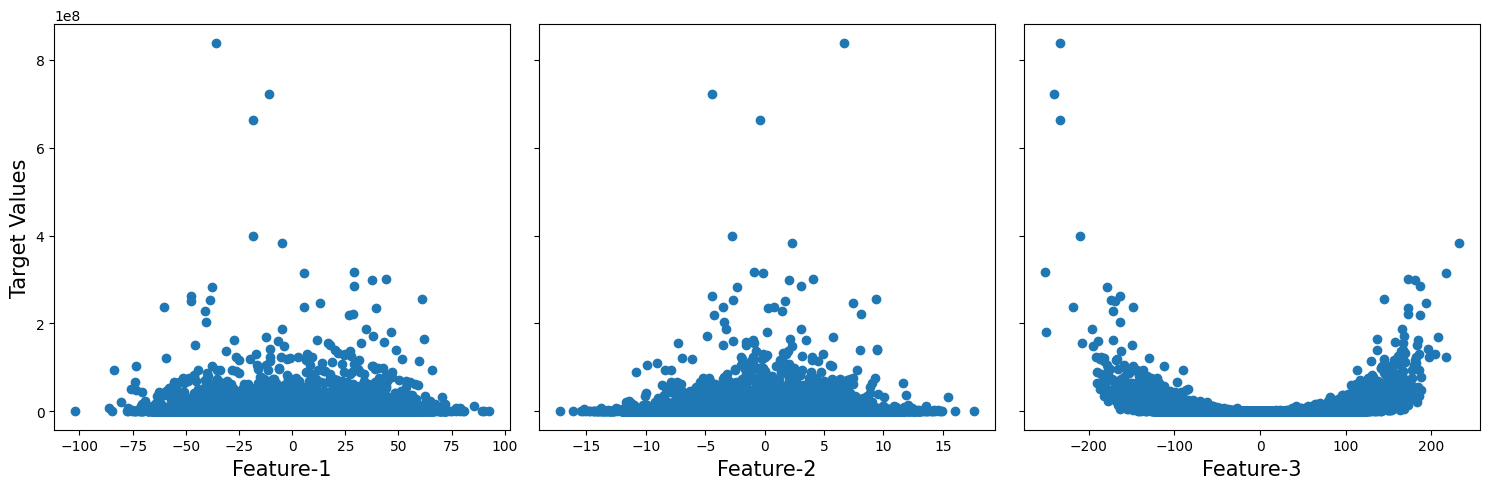

In [8]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5)) 

for i in range(3):
    ax[i].scatter(X_train[:, i], Y_train)
    ax[i].set_xlabel(f"Feature-{i + 1}" , size=15)

ax[0].set_ylabel('Target Values', size = 15)
plt.tight_layout()

plt.show()



<h3>Defining some necessary function</h3>

In [9]:
'''function to compute cost-function'''
def compute_cost(X ,Y, w , b):
    m,n = X.shape
    f_wb = np.dot(X,w)+b
    cost = np.sum((f_wb - Y)**2)
    cost = (cost)/(2*m)
    return cost

In [10]:
def compute_gradient(X,Y,w,b):
    m,n = X.shape
    dj_dw= np.zeros(n)
    f_wb = np.dot(X,w)+b
    dj_db = np.mean((f_wb- Y))
    dj_dw  =  (f_wb - Y)@X
    dj_dw = (dj_dw)/m
    return dj_dw,dj_db

In [11]:
'''function to perform Gradient Descent algorithm'''
def Gradient_descent(X, Y , num_iters,alpha,):
    m,n = X.shape
    w= np.zeros(X.shape[1])    
    b= 0
    cost_history = []
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(X,Y,w,b)
        w = w - (alpha*dj_dw)
        b = b - (alpha*dj_db)
        cost_history.append(compute_cost(X,Y,w,b))
        if ( i% math.ceil(num_iters/50) == 0):
            print(f"Iterations : {i:5} , cost : {cost_history[-1]}")
    return w, b, cost_history
    


<h3>Creating Higher degree polynomials</h3>

In [12]:
def count_valid_combinations(degree):
    count = 0
    for i in range(degree + 1):
        for j in range(degree + 1):
            for k in range(degree + 1):
                if i + j + k <= degree:
                    count += 1
    return count

def add_poly_features(X, degree):
    m, n = X.shape
    num_combinations = count_valid_combinations(degree)
    X_new = np.zeros((m, num_combinations))

    combination_idx = 0
    for i in range(degree + 1):
        for j in range(degree + 1):
            for k in range(degree + 1):
                if i + j + k <= degree:
                    X_new[:, combination_idx] = (X[:, 0]**i) * (X[:, 1]**j) * (X[:, 2]**k)
                    combination_idx += 1

    return X_new

In [13]:
X_new_train = np.delete(add_poly_features(X_train , 6) ,   0 , axis =1)
print(X_new_train[0,:])
X_new_val = np.delete(add_poly_features(X_val , 6) ,   0 , axis =1)

[ 8.75310763e+00  7.66168931e+01  6.70635912e+02  5.87014831e+03
  5.13820400e+04  4.49752526e+05  3.23110615e+00  2.82822199e+01
  2.47557315e+02  2.16689582e+03  1.89670723e+04  1.66020825e+05
  1.04400470e+01  9.13828546e+01  7.99883962e+02  7.00147041e+03
  6.12846240e+04  3.37328999e+01  2.95267704e+02  2.58450999e+03
  2.26224941e+04  1.08994580e+02  9.54041293e+02  8.35082612e+03
  3.52173059e+02  3.08260869e+03  1.13790854e+03 -1.14587433e+01
 -1.00299613e+02 -8.77933309e+02 -7.68464474e+03 -6.72645225e+04
 -5.88773605e+05 -3.70244159e+01 -3.24078697e+02 -2.83669571e+03
 -2.48299029e+04 -2.17338812e+05 -1.19629818e+02 -1.04713267e+03
 -9.16566497e+03 -8.02280520e+04 -3.86536640e+02 -3.38339681e+03
 -2.96152365e+04 -1.24894092e+03 -1.09321143e+04 -4.03546067e+03
  1.31302798e+02  1.14930752e+03  1.00600124e+04  8.80563713e+04
  7.70766895e+05  4.24253277e+02  3.71353459e+03  3.25049680e+04
  2.84519483e+05  1.37080737e+03  1.19988245e+04  1.05027002e+05
  4.42922413e+03  3.87694

<h3>Feature Scaling</h3>
<h4>Z-Score Normalization</h4>

In [14]:
'''function to calculate mean of each feature'''
def mean(X):
    return np.mean(X , axis = 0)         #returns array containing mean of each feature

In [15]:
'''function to calculate standard deviation of each feature'''
def std_dev(X):
    return np.std(X, axis =0)      #returns array containing standard deviation of each feature

In [16]:
'''function to scale input features using Z-score normalization technique'''
def Z_norm(X , X_val = None):
    if X_val is not None:
        m,n = X_val.shape
        mu = mean(X)
        std = std_dev(X)
        X_norm = (X_val- mu)/std               # X_norm =(m,n)
        return X_norm
        
    m,n = X.shape
    mu = mean(X)
    std = std_dev(X)
    X_norm = (X- mu)/std               # X_norm =(m,n)
    return X_norm                      #returns array of scaled features                       

In [17]:
X_train_final = Z_norm(X_new_train)
print(X_train_final[0,:])
X_val_final = Z_norm(X_new_train , X_new_val)

[ 1.59520246e-01 -6.89499090e-01  2.83901685e-03 -3.00559863e-01
  3.32026940e-03 -1.34932447e-01  8.01299621e-01  1.21562729e-01
  6.35254237e-03 -4.17656684e-04 -5.63093461e-03 -1.93337343e-03
 -2.44340057e-01  6.10342116e-02 -3.51187614e-01 -1.09822865e-03
 -1.77014365e-01  1.28098275e-01  2.58803153e-02 -2.41899711e-03
  5.66083652e-03 -2.55789825e-01  7.16848438e-03 -1.72063999e-01
  7.41289337e-03  1.29258785e-02 -1.41097843e-01 -5.26629549e-01
 -7.79588031e-02 -4.91269511e-03  8.83346052e-03  5.38943009e-04
  8.83113664e-03 -4.23990981e-01 -6.92100990e-02 -1.44460591e-03
 -3.66879834e-03  8.51567420e-03 -1.89569195e-01 -2.81326554e-02
  4.52808035e-04 -4.04376855e-04 -7.15519681e-02 -1.33371881e-02
  1.54776239e-03 -1.79208426e-02 -1.05040600e-03 -7.96266193e-03
 -5.08411090e-01  3.32810451e-02 -3.59432740e-01  6.07096534e-05
 -1.66710857e-01  1.29636513e-01  1.11484165e-02 -1.86191526e-03
 -5.13781395e-03 -2.81499231e-01  1.44449268e-02 -1.92423583e-01
  2.01421225e-02  5.13170

<h3>Finding parameters using Gradient Descent Algorithm</h3>
<h5>Initialized weights and biases with zeroes of respective size</h5>

In [18]:
alpha = 0.1
num_iters = 50000
w_final , b_final , J_history = Gradient_descent(X_train_final , Y_train ,num_iters , alpha)


Iterations :     0 , cost : 35243704923636.51
Iterations :  1000 , cost : 13973626082.291145
Iterations :  2000 , cost : 1319798635.3494077
Iterations :  3000 , cost : 132784544.52413362
Iterations :  4000 , cost : 13826272.213793695
Iterations :  5000 , cost : 1495404.8662242317
Iterations :  6000 , cost : 169222.89037167348
Iterations :  7000 , cost : 20169.093111652197
Iterations :  8000 , cost : 2540.1751153409296
Iterations :  9000 , cost : 337.55582301756556
Iterations : 10000 , cost : 47.055194091559464
Iterations : 11000 , cost : 6.8240047214761725
Iterations : 12000 , cost : 1.0205656516148256
Iterations : 13000 , cost : 0.15618386880275126
Iterations : 14000 , cost : 0.024306557470463612
Iterations : 15000 , cost : 0.0038289170356555426
Iterations : 16000 , cost : 0.0006084544607817988
Iterations : 17000 , cost : 9.730575319270524e-05
Iterations : 18000 , cost : 1.563402123889788e-05
Iterations : 19000 , cost : 2.520584222945556e-06
Iterations : 20000 , cost : 4.0743132053023

In [19]:
print(b_final)

1791812.8003266274


In [20]:
print(w_final)
w_final.shape

[-2.26273948e-08 -1.16350673e-07  3.42798335e-01  2.61090880e-07
 -5.91603729e-08  8.95272099e+06  1.41908432e-09 -2.15062527e-09
 -7.34172422e-09 -2.37203272e-10  7.21877300e-09  1.04050905e+06
 -2.34695735e-09 -5.77977256e-10  7.00667655e-09 -1.79959014e-09
  1.02734143e+05  2.32461668e-09  3.70963176e-10 -1.78008515e-09
  8.31701381e+03  2.64809229e-03  1.82438422e-09  5.40349883e+02
 -1.19327334e-09  2.82867462e+01  1.13099227e+00 -3.51797345e-09
 -3.80758000e-08  1.75367138e-08  8.97366862e-08 -2.33996448e-08
  6.61605435e+06 -1.62032052e-09 -5.15809788e-09  1.17820246e-08
  5.73663700e-09  6.46719623e+05 -1.03620201e-09 -5.19626876e-09
 -1.17298549e-09  6.15132858e+04 -3.00948482e-09 -1.25883701e-10
  4.82584660e+03  2.13947028e-09  2.91334353e+02  1.19855084e+01
 -6.92107654e-09  9.38876266e-09  2.87065516e-08 -1.36266191e-08
  3.23489704e+06 -2.40646647e-09  5.39427993e-09  4.43989724e-09
  3.18867000e+05 -6.86950588e-10  8.12992081e-10  2.88428611e+04
 -6.42884956e-10  2.10548

(83,)

<h3>COST VS NUMBER  OF ITERATIONS PLOT</h3>

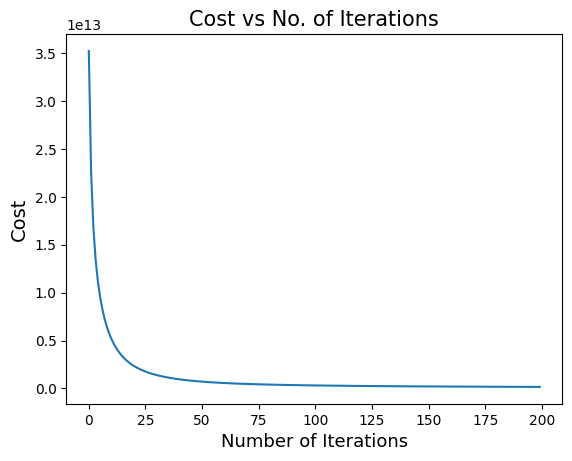

In [21]:
plt.plot(np.arange(len(J_history))[:200], J_history[:200])
plt.xlabel('Number of Iterations', size = 13)
plt.ylabel('Cost', size = 14)
plt.title('Cost vs No. of Iterations', size= 15)
plt.show()

<h3>Model Performance over Validation Set</h3>

In [22]:
def prediction(x,w,b):
    return (np.dot(x,w)+b)

In [23]:
for i in range(100):
    print(f"prediction : {prediction(X_val_final[i],w_final ,b_final)} , target value : {Y_val[i]}")

prediction : 1472.7357922513038 , target value : 1472.73579224766
prediction : -61.460984118282795 , target value : -61.460984085192
prediction : 229.8179475280922 , target value : 229.81794751920148
prediction : 15.077939796959981 , target value : 15.077939774281312
prediction : 30.4791866641026 , target value : 30.479186657475232
prediction : -7.204167569056153 , target value : -7.204167586719962
prediction : 55088.51441887673 , target value : 55088.51441890162
prediction : 2819984.32503942 , target value : 2819984.325039436
prediction : 2603.195066553075 , target value : 2603.1950665421336
prediction : 2.7212244221009314 , target value : 2.721224391605205
prediction : 80.04194343579002 , target value : 80.04194341696055
prediction : 133.04978783009574 , target value : 133.04978782058313
prediction : 928015.3087247342 , target value : 928015.3087247822
prediction : 0.42913328064605594 , target value : 0.4291332500769362
prediction : 0.16001214599236846 , target value : 0.160012120825

In [24]:
Y_predict=np.array(prediction(X_val_final[:100], w_final, b_final))

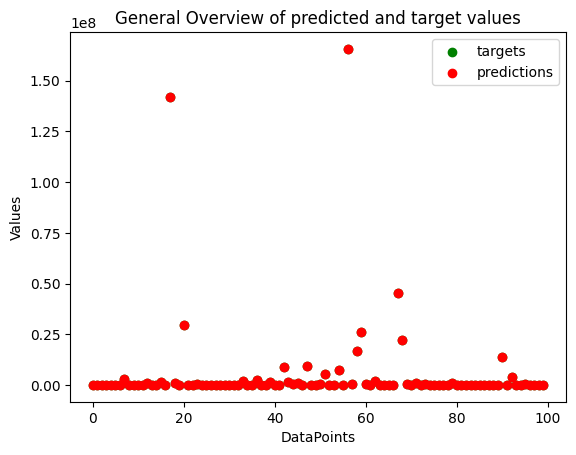

In [25]:
plt.scatter(np.arange(100), Y_val[:100], label='targets' , c='g')   
plt.scatter(np.arange(100), Y_predict, label='predictions', c='r')
plt.title('General Overview of predicted and target values')
plt.xlabel('DataPoints')
plt.ylabel('Values')
plt.legend()
plt.show()


In [26]:
SSR = np.sum((Y_val - prediction(X_val_final, w_final, b_final))**2)
SST =np.sum((Y_val - np.mean(Y_val))**2)
R2_SCORE = 1-(SSR/SST)
print(f'R2 SCORE = {R2_SCORE}')

R2 SCORE = 1.0


In [27]:
mse_train = compute_cost(X_train_final, Y_train , w_final , b_final)
print(mse_train)

1.0853223639147256e-15


In [28]:
mse_val = compute_cost(X_val_final, Y_val , w_final , b_final)
print(mse_val)

7.922074452059576e-16


In [29]:
SSR = np.sum((Y_train - prediction(X_train_final, w_final, b_final))**2)
SST =np.sum((Y_train - np.mean(Y_train))**2)
R2_SCORE = 1-(SSR/SST)
print(f'R2 SCORE = {R2_SCORE}')

R2 SCORE = 1.0


<h3>Testing the model on the Test dataset</h3>

In [30]:
test_data = pd.read_csv("Downloads\\Polynomialdata_test.csv")
# print(test_data.columns)
test_data = test_data.to_numpy()

In [31]:
X_test = np.delete(test_data , 0 , axis =1)
ID = test_data[:,0]

In [32]:
X_test.shape

(10000, 3)

In [33]:
X_test = np.delete(add_poly_features(X_test , 6) ,   0 , axis =1)
print(X_test[0,:])

[ 4.38359472e+01  1.92159027e+03  8.42347296e+04  3.69250916e+06
  1.61864637e+08  7.09548967e+09 -2.37270368e+00 -1.04009713e+02
 -4.55936430e+03 -1.99864053e+05 -8.76123007e+06 -3.84056819e+08
  5.62972275e+00  2.46784229e+02  1.08180204e+04  4.74218173e+05
  2.07878028e+07 -1.33576639e+01 -5.85545849e+02 -2.56679569e+04
 -1.12517920e+06  3.16937782e+01  1.38932679e+03  6.09024558e+04
 -7.51999442e+01 -3.29646079e+03  1.78427184e+02  3.62476426e+01
  1.58894975e+03  6.96531173e+04  3.05331038e+06  1.33844752e+08
  5.86721150e+09 -8.60049151e+01 -3.77010692e+03 -1.65266208e+05
 -7.24460076e+06 -3.17573937e+08  2.04064178e+02  8.94534655e+03
  3.92127739e+05  1.71892909e+07 -4.84183827e+02 -2.12246567e+04
 -9.30402930e+05  1.14882475e+03  5.03598210e+04 -2.72582070e+03
  1.31389160e+03  5.75956827e+04  2.52476131e+06  1.10675303e+08
  4.85155676e+09 -3.11747543e+03 -1.36657488e+05 -5.99051044e+06
 -2.62599699e+08  7.39684541e+03  3.24247725e+05  1.42137062e+07
 -1.75505223e+04 -7.69343

In [34]:
X_test_final = Z_norm(X_new_train , X_test)
print(X_test[0,:])

[ 4.38359472e+01  1.92159027e+03  8.42347296e+04  3.69250916e+06
  1.61864637e+08  7.09548967e+09 -2.37270368e+00 -1.04009713e+02
 -4.55936430e+03 -1.99864053e+05 -8.76123007e+06 -3.84056819e+08
  5.62972275e+00  2.46784229e+02  1.08180204e+04  4.74218173e+05
  2.07878028e+07 -1.33576639e+01 -5.85545849e+02 -2.56679569e+04
 -1.12517920e+06  3.16937782e+01  1.38932679e+03  6.09024558e+04
 -7.51999442e+01 -3.29646079e+03  1.78427184e+02  3.62476426e+01
  1.58894975e+03  6.96531173e+04  3.05331038e+06  1.33844752e+08
  5.86721150e+09 -8.60049151e+01 -3.77010692e+03 -1.65266208e+05
 -7.24460076e+06 -3.17573937e+08  2.04064178e+02  8.94534655e+03
  3.92127739e+05  1.71892909e+07 -4.84183827e+02 -2.12246567e+04
 -9.30402930e+05  1.14882475e+03  5.03598210e+04 -2.72582070e+03
  1.31389160e+03  5.75956827e+04  2.52476131e+06  1.10675303e+08
  4.85155676e+09 -3.11747543e+03 -1.36657488e+05 -5.99051044e+06
 -2.62599699e+08  7.39684541e+03  3.24247725e+05  1.42137062e+07
 -1.75505223e+04 -7.69343

In [35]:
for i in range(100):
    print(f" IDs : {ID[i]} , prediction : {prediction(X_test_final[i],w_final ,b_final)}")

 IDs : 16588.0 , prediction : 566024.0535957864
 IDs : 17513.0 , prediction : 954693.4667236755
 IDs : 14448.0 , prediction : 19975.649682738353
 IDs : 13972.0 , prediction : 732186.0769176127
 IDs : 18321.0 , prediction : 58.56673395005055
 IDs : 19593.0 , prediction : 29598.72759540612
 IDs : 16569.0 , prediction : 66918.86113022151
 IDs : 11736.0 , prediction : -0.006399928126484156
 IDs : 18654.0 , prediction : 14.433940558927134
 IDs : 12539.0 , prediction : 120078.80564773292
 IDs : 19545.0 , prediction : -85.77719078306109
 IDs : 10113.0 , prediction : 1541292.9048888176
 IDs : 19387.0 , prediction : 957939.6877904776
 IDs : 10985.0 , prediction : 98951.69175048498
 IDs : 18805.0 , prediction : 118889699.74985273
 IDs : 12993.0 , prediction : 34584.769841923844
 IDs : 17187.0 , prediction : 13878818.805513347
 IDs : 11290.0 , prediction : 426148.79699205514
 IDs : 12106.0 , prediction : 20538.429661397124
 IDs : 11139.0 , prediction : 1338.5204784614034
 IDs : 15128.0 , predicti

In [36]:
Y_test = prediction(X_test_final,w_final ,b_final)
print(Y_test.shape)

(10000,)


In [37]:
Predictions=np.c_[(ID,Y_test)]

In [38]:
df = pd.DataFrame(Predictions , columns=['IDs','Predicted Values'])
df.to_csv("Downloads\\CL-Project\\Polynomial_Reg_Predictions.csv" , index=False)